<a href="https://colab.research.google.com/github/RinaHariyanti/PCVK_Genap_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. import folder dari GoogleDrive

In [28]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


2. import library

In [29]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3.  Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)


<BarContainer object of 256 artists>

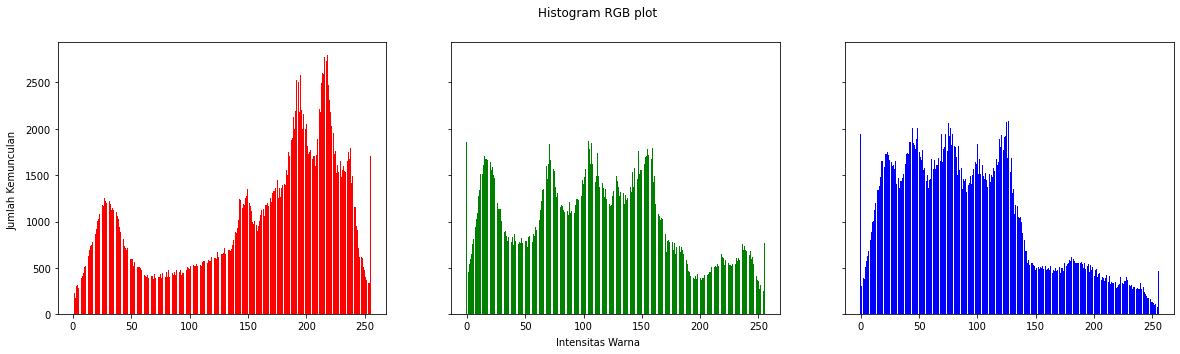

In [30]:
image  = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
height, width, depth = np.shape(image)
names = np.arange(256)

b = [0]*256
g = [0]*256
r = [0]*256

for y in range (0,height) :
  for x in range (0,width) :
    b[image[y][x][0]] += 1
    g[image[y][x][1]] += 1
    r[image[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, r, color = 'red')
axs[1].bar(names, g, color = 'green')
axs[2].bar(names, b, color = 'blue')

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan 
hasilnya. Apakah output muncul sama?

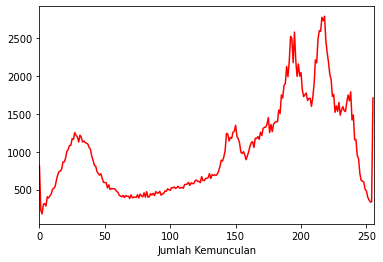

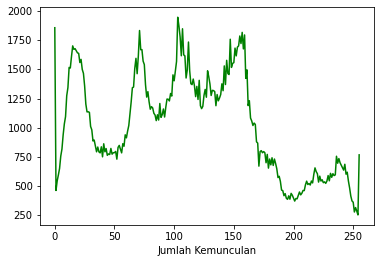

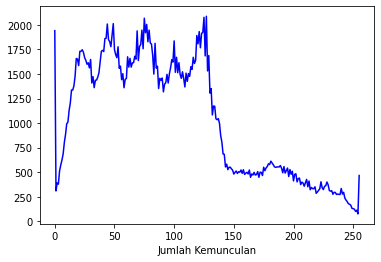

In [31]:
from numpy.lib.histograms import histogram

lena_original = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
colors = ("red", "green", "blue")
channel_ids = (2, 1, 0)

plt.xlim([0,256])
for channel_id, c in zip(channel_ids, colors):
  histogram, bin_edges = np.histogram(
      lena_original[:, :, channel_id], bins=256, range = (0,256)
  )
  plt.plot(bin_edges[0:-1], histogram, color=c)

  plt.xlabel("Intensitas Warna")
  plt.xlabel("Jumlah Kemunculan")

  plt.show()
  plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)


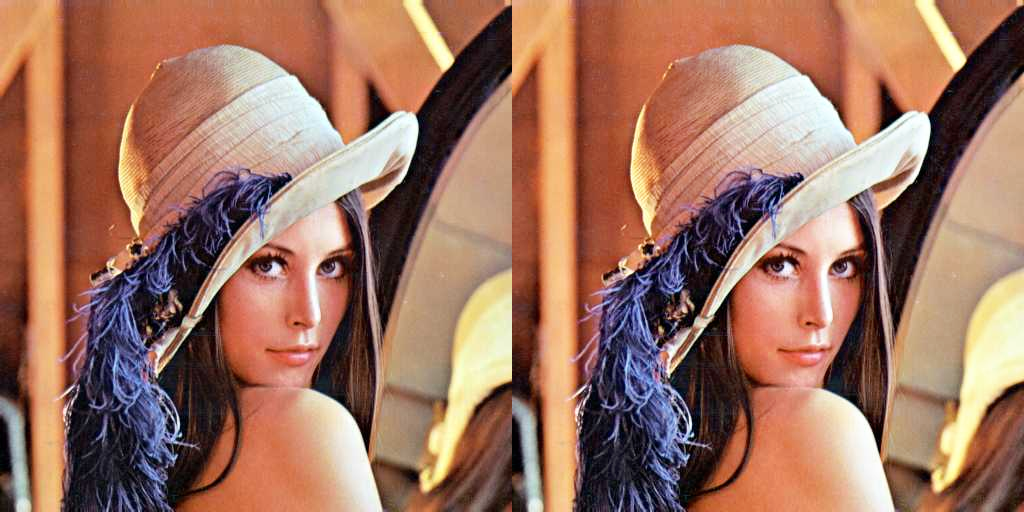

<BarContainer object of 256 artists>

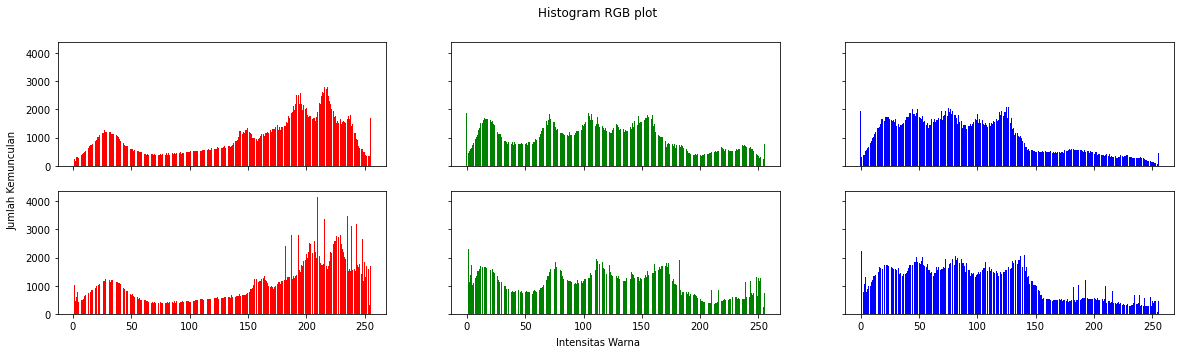

In [33]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
height, width, depth = np.shape(img)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

def histog(img):

  height, width, depth = np.shape(img) 

  ax = np.zeros((3,256)) 
  for y in range(0,height) : 
    for x in range(0,width) :
      ax[0][img[y][x][0]] += 1 
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1 
  return ax

histo_asli = histog(img)
img_array = np.asarray(img)
histogram_array = np.bincount(img_array.flatten(), minlength=256)

num_pixels = np. sum(histogram_array) 
histogram_array = histogram_array/num_pixels
chistogram_array = np.cumsum(histogram_array)

transform_map = np.floor(255 * chistogram_array). astype (np.uint8)
 
img_list = list(img_array.flatten())

eq_img_list = [transform_map[p] for p in img_list]

eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape) 
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img, img2)) 
cv2_imshow(final_frame)

names = np.arange (256) 
fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
fig.suptitle('Histogram RGB plot') 
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
axs[0,0].bar(names, histo_asli[2], color='red') 
axs[0,1].bar(names, histo_asli[1], color='green') 
axs[0,2].bar(names, histo_asli[0], color='blue') 
axs[1,0].bar(names, equal_histo[2], color='red') 
axs[1,1].bar(names, equal_histo[1], color='green')
axs[1,2].bar(names, equal_histo[0], color='blue')
     


6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?


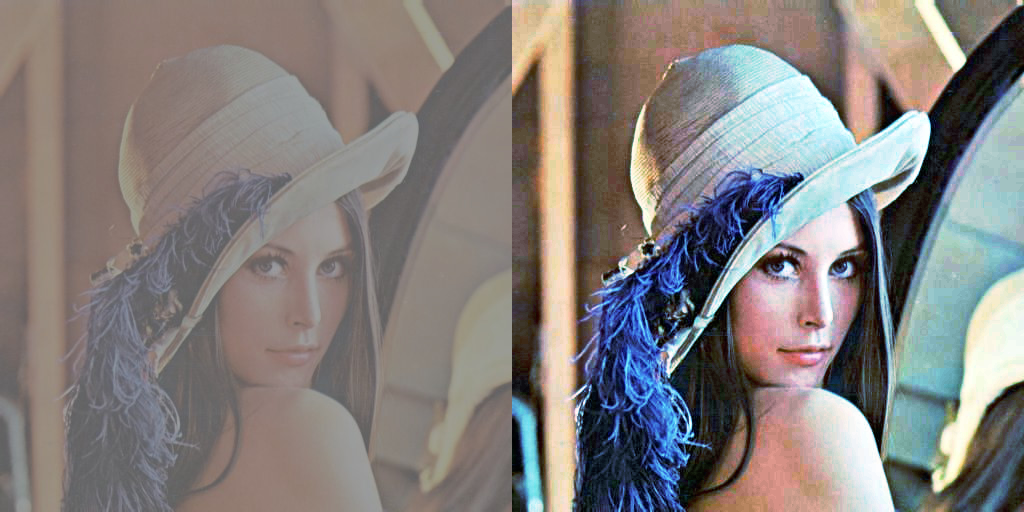

<BarContainer object of 256 artists>

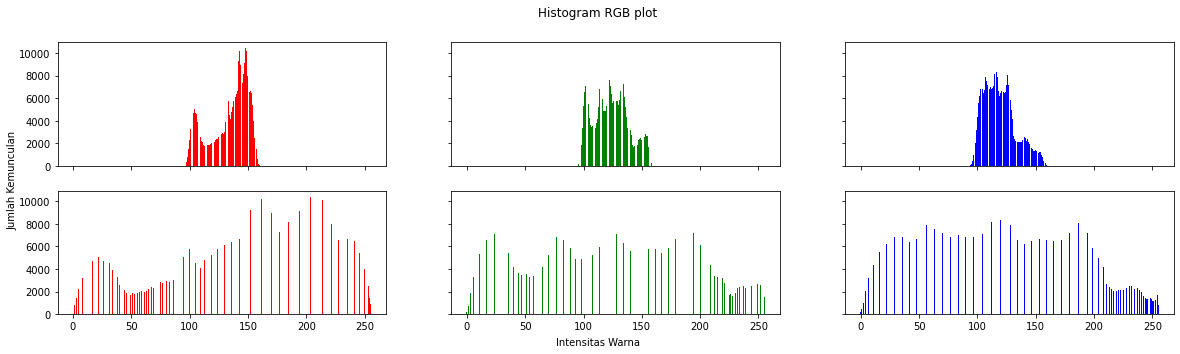

In [34]:
img  = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3,256))
  for h in range(0,height):
    for w in range(0,width):
      ax[0][img1[h][w][0]] += 1
      ax[1][img1[h][w][1]] += 1
      ax[2][img1[h][w][2]] += 1
  return ax


histo_asli = histog(img)

channels = cv.split(img)
eq_channels = []
for ch, color in zip(channels, ['R', 'G', 'B']):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img, eq_image))
cv2_imshow(final_frame)

height, width, depth = np.shape(img)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0,0].bar(names, histo_asli[2], color='red')
axs[0,1].bar(names, histo_asli[1], color='green')
axs[0,2].bar(names, histo_asli[0], color='blue')
axs[1,0].bar(names, equal_histo[2], color='red')
axs[1,1].bar(names, equal_histo[1], color='green')
axs[1,2].bar(names, equal_histo[0], color='blue')

7.  Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)


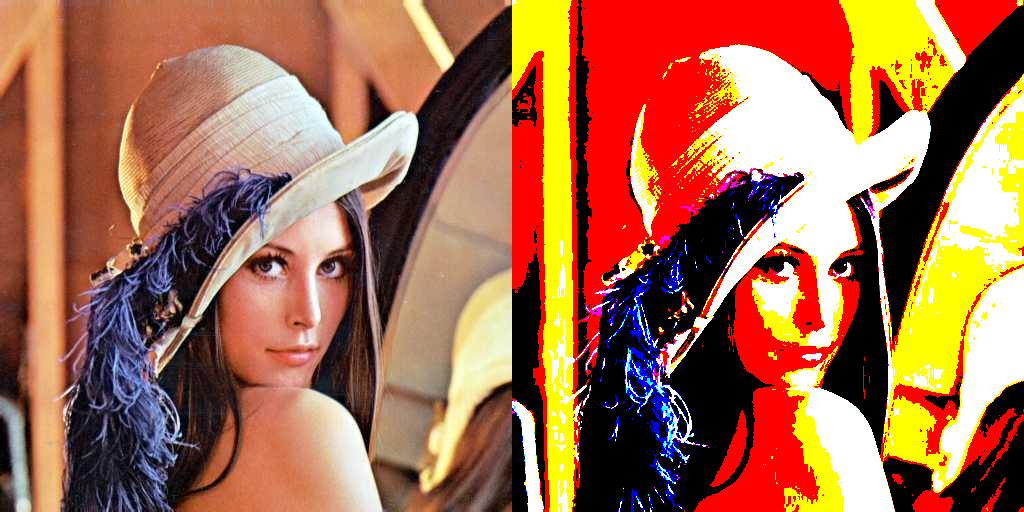

In [52]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16jt = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16jt.shape, img_16jt.dtype)

for y in range(0, img_16jt.shape[0]):
  for x in range(0, img_16jt.shape[1]):
    baru = warnaTerdekat(img_16jt[y, x, 0], img_16jt[y, x, 1], img_16jt[y, x, 2])
    img_8[y, x] = warnaPallette[baru]
    
img_16jt = cv.cvtColor(img_16jt, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16jt, img_8))
cv2_imshow(final_frame)

8.  Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)


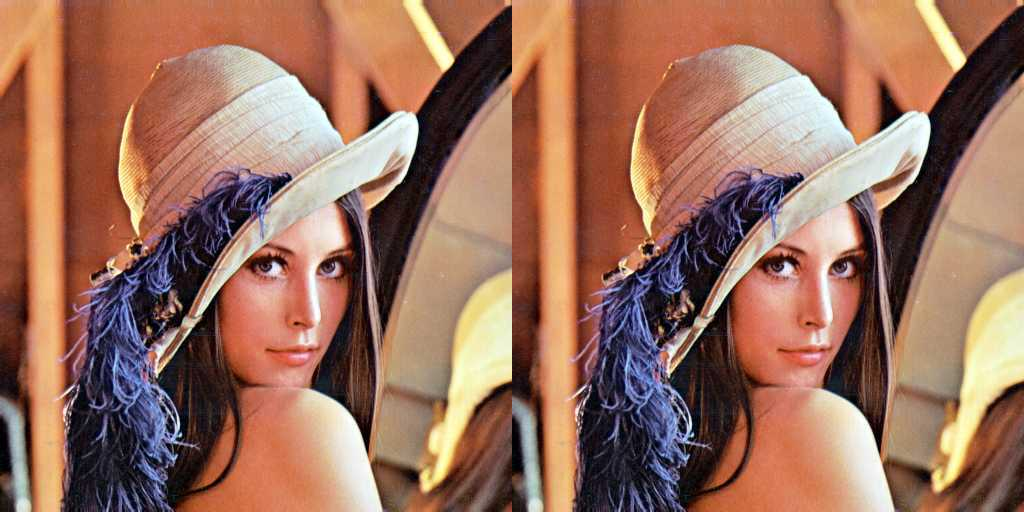

In [61]:
from PIL import Image

# Load image and convert it to RGB using Floyd-Steinberg dithering
imageConvert = Image.open('/content/drive/MyDrive/PCVK/Images/lena.jpg').convert(mode='RGB', dither=Image.FLOYDSTEINBERG)
imageConvert.save('/content/drive/MyDrive/PCVK/Images/lena2.jpg')

# Load the original image
ImageOriginal = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

# Load the dithered image
ImageDithered = cv.imread('/content/drive/MyDrive/PCVK/Images/lena2.jpg')

# Display the original and dithered images
final_frame = cv.hconcat((ImageOriginal, ImageDithered))
cv2_imshow(final_frame)

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram 
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!


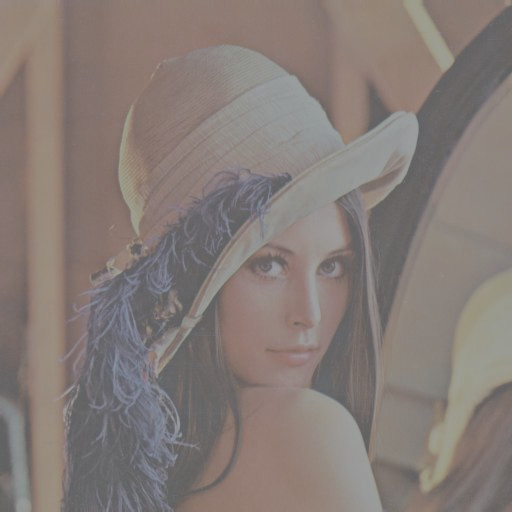

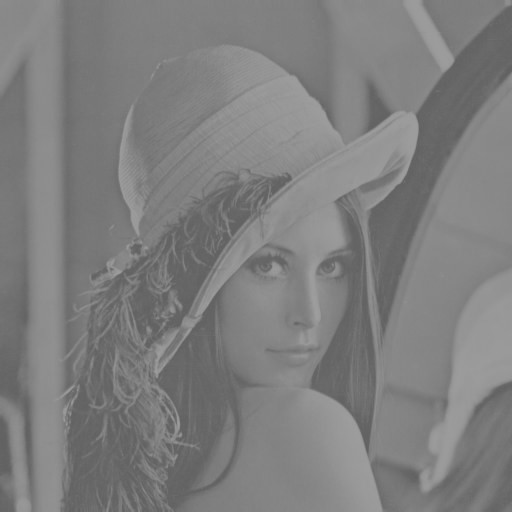

In [56]:
img_original = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

img_grayscale= cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg', cv.IMREAD_GRAYSCALE)

# Display the img_original and img_grayscale
cv2_imshow(img_original)
cv2_imshow(img_grayscale)

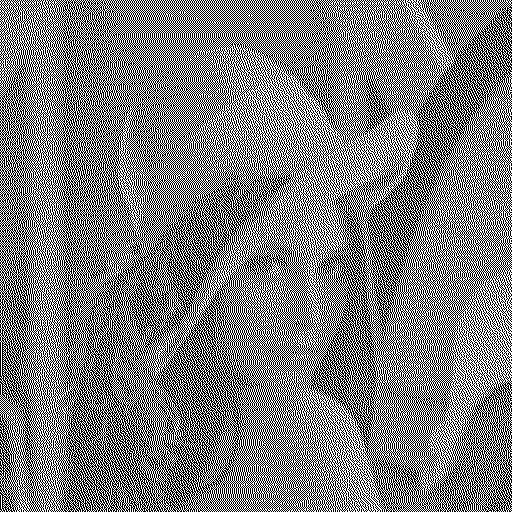

In [60]:
from PIL import Image
import cv2
import numpy as np

imageConvert = Image.open('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg').convert(mode='1',dither=Image.FLOYDSTEINBERG)
imageConvert.save('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

Image = cv2.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

GrayImage = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg', GrayImage)

Height = GrayImage.shape[0]
Width = GrayImage.shape[1]

for y in range(0, Height):
    for x in range(0, Width):

        old_value = GrayImage[y, x]
        new_value = 0
        if (old_value > 128) :
            new_value = 255

        GrayImage[y, x] = new_value

        Error = old_value - new_value

        if (x<Width-1):
            NewNumber = GrayImage[y, x+1] + Error * 7 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y, x+1] = NewNumber

        if (x>0 and y<Height-1):
            NewNumber = GrayImage[y+1, x-1] + Error * 3 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x-1] = NewNumber

        if (y<Height-1):
            NewNumber= GrayImage[y+1, x] + Error * 5 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x] = NewNumber

        if (y<Height-1 and x<Width-1):
            NewNumber = GrayImage[y+1, x+1] + Error * 1 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x+1] = NewNumber

cv2.imwrite('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg', GrayImage)
cv2_imshow(GrayImage)